# DBSCAN Challenge
Within this challenge, you're going to use DBSCAN on the famous Iris dataset to cluster the petal length and petal width. Typically, clustering is done using all columns but for visualization purposes, we're only going to use two in this exercise.

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.cluster import DBSCAN
from sklearn import datasets

As said in the introduction, we're only going to use `petal_length` and `petal_width` to cluster observations to see similar/different `species` are.

In [6]:
# Load the dataset.
data = sns.load_dataset('iris')

In [4]:
# Résumé des informations du dataframe
your_dataframe = data
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
print(f"\ndf head :\n{your_dataframe.head(2)} \n")
print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (150, 5) 
list columns :
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] 
liste des colonnes numeriques: 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

liste des colonnes non numeriques: 
['species'] 
Colonne avec des na :sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64 


df head :
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa 


df describe :
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.3

In [8]:
df = data.copy()
# For the 'species' column, replace [setosa, versicolor, virginica] with [0, 1, 2], respectively.
# To be explicit, this means that all observations with a species of "setosa" should now have a species of 0
# INSERT CODE HERE
your_dataframe = df
your_col_to_transform = 'species'
# Créer un dictionnaire pour mapper les valeurs
dico_mapping = {'setosa': 0,
                'versicolor': 1,
                'virginica': 2
                }
# Remplace les valeurs
df[your_col_to_transform] = df[your_col_to_transform].map(dico_mapping)
# Rajoute la colonne transformée au dataframe
df = df[['sepal_length', 'sepal_width', 'petal_length',
         'petal_width', your_col_to_transform]]
# df = df['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [9]:
# Résumé des informations du dataframe
your_dataframe = df
print(f"\nshape: {your_dataframe.shape} \nlist columns :\n{
      your_dataframe.columns.tolist()} ")
print(f"liste des colonnes numeriques: \n{
      your_dataframe.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"liste des colonnes non numeriques: \n{
      your_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()} ")
print(f"Colonne avec des na :{your_dataframe.isna().sum()} \n")
# print(f"\ndf head :\n{your_dataframe.head(2)} \n")
# print(f"\ndf describe :\n{your_dataframe.describe()} \n")


shape: (150, 5) 
list columns :
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] 
liste des colonnes numeriques: 
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

liste des colonnes non numeriques: 
[] 
Colonne avec des na :sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64 



In [ ]:
import os
import random
import secrets
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from flask import Flask, request, render_template, session, url_for, redirect

In [10]:
# Split the dataset into just X and Y
# Note: Since we're clustering, there's no need to split into train/validation/test splits but rather just X and Y

# INSERT CODE HERE
from sklearn.model_selection import train_test_split
your_dataframe, your_colonne = df, 'species'
X = your_dataframe
# X.drop(your_colonne, axis=1, inplace=True)
y = your_dataframe[your_colonne]
# Creation train et test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42)

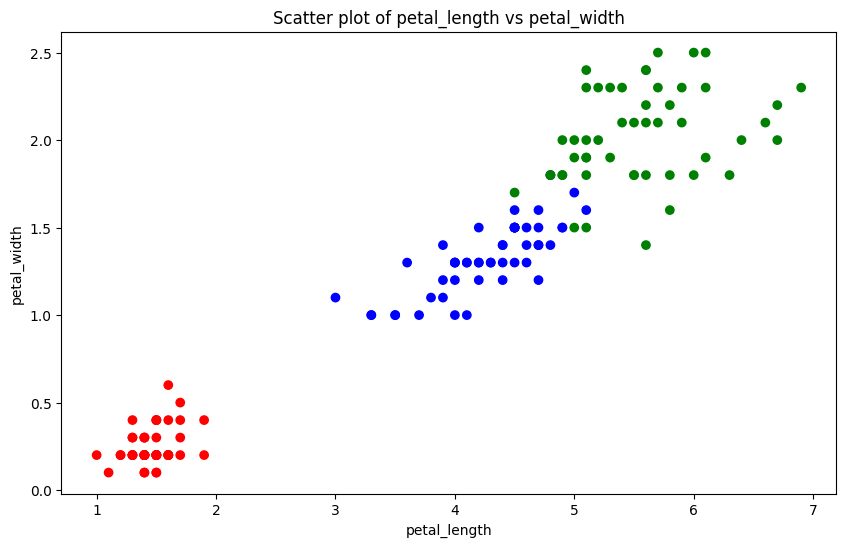

In [11]:
# Using matplotlib, plot the original datapoints such that each species is a different color
# Make petal_length the x-axis and petal_width the y-axis
# For example, all observations with (species == 0) should be red, all observations with species == 1 should be blue, etc.

# INSERT CODE HERE
import matplotlib.pyplot as plt

# Create a color dictionary
colors = {0: 'red', 1: 'blue', 2: 'green'}

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['petal_length'], df['petal_width'], c=df['species'].map(colors))

# Set the title and labels
plt.title('Scatter plot of petal_length vs petal_width')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# Show the plot
plt.show()

In [12]:
# Using the default parameters of DBSCAN in Scikit-Learn, cluster the observations and print out each observations predictions.
# For example, the output should be something like [0, 0, 1, 1, 2, 2, ...]

# INSERT CODE HERE
# Choix du modéle
# model = LogisticRegression()
# model = LinearRegression()
# model = KNeighborsRegressor()
# model = DecisionTreeClassifier()
# model = DecisionTreeRegressor()
# model = RandomForestClassifier()
# model = svm.SVR(kernel="linear")
# model = SGDRegressor()
model = DBSCAN()
# Entrainnement du modele sur df et fourni les labels des clusters
labels = model.fit_predict(df[['petal_length', 'petal_width']])

# Print the cluster labels for each observation
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


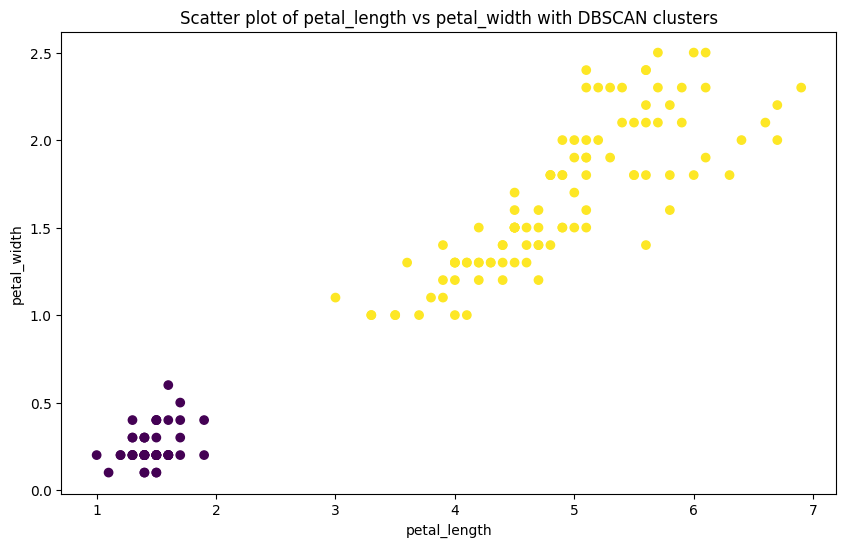

In [13]:
# Using these predictions, again plot the predicted clusters with matplotlib.

# INSERT CODE HERE
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['petal_length'], df['petal_width'], c=labels, cmap='viridis')

# Titre et labels
plt.title('Scatter plot of petal_length vs petal_width with DBSCAN clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# Show the plot
plt.show()

In [20]:
# Now choose epsilon to be 0.2 and minsamples to be 5 and repeat the process of predicting.
# If you cannot recall what these hyperparameters represent, refer back to the Quest so that you have an understanding of what is changing

# INSERT CODE HERE
from sklearn.cluster import DBSCAN
import plotly.express as px

# Créer un objet DBSCAN avec epsilon=0.2 et min_samples=5
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Adapter le modèle aux données et obtenir les étiquettes de cluster
labels = dbscan.fit_predict(df[['petal_length', 'petal_width']])

# Imprimer les étiquettes de cluster pour chaque observation
print(labels)

# Ajouter les étiquettes de cluster au DataFrame
df['cluster'] = labels

# Créer un graphique de dispersion
fig = px.scatter(df, x='petal_length', y='petal_width', color='cluster')

# Afficher le graphique
fig.show()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  2 -1  2 -1  1 -1 -1 -1  1  1  2  1 -1 -1 -1 -1 -1  1
  2  1 -1  1  2 -1  1  1  2 -1 -1 -1  2  1 -1 -1  2 -1  1  2  2 -1  1  2
  2 -1  1  1 -1  1]


In [ ]:
# Question: Within these predictions, what do you think -1 represents? Remember that the only labels that we assigned we're 0, 1, and 2.
# To give you a hint, what are the two things that DBSCAN is concerned with (which is also listed in the Quest)?

# ANSWER HERE

avec DBSCAN un cluster de -1 signifie qu'il n'est pas significatif car il y a trop de bruit, ou il est trop éloigné,de fait il n'appartient à aucun cluster. 
DBSCAN est le seul qui peut detecter et marquer le bruit dans les données


- `eps=0.5` : distance max entre deux échantillons pour qu'ils soient considérés comme appartenant au même voisinage, si la distance entre deux points est inférieure ou égale à `eps`, alors ces points sont considérés comme voisins. Une petite valeur d'`eps` signifie que les clusters seront plus compacts.

- `min_samples=3` : nombre minimum d'échantillons (ou poids total) dans un voisinage pour qu'un point soit considéré comme un point central. Cela comprend le point lui-même. Un point est considéré comme un point central (c'est-à-dire le point principal d'un cluster) s'il a au moins `min_samples` points dans son voisinage, y compris lui-même.

l'algorithme DBSCAN s'initialise avec une distance maximale de 0.5 entre deux échantillons pour qu'ils soient considérés comme voisins, et un échantillon doit avoir au moins 3 voisins pour être considéré comme un point central. 😊

In [31]:
# Now using the predictions with epsilon = 0.2 and minsamples = 5

# INSERT CODE HERE
# INSERT CODE HERE
from sklearn.cluster import DBSCAN
import plotly.express as px

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Définir les plages de epsilon et min_samples
E = np.arange(0.1, 1.0, 0.1)  # epsilon varie de 0.1 à 1.0 par pas de 0.1
K = range(1, 5)  # min_samples varie de 1 à 5

best_eps = 0
best_min_samples = 0
best_score = -1

for eps in E:
    for min_samples in K:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['petal_length', 'petal_width']])
        if len(set(labels)) > 1:  # pour éviter les cas où tous les points sont du bruit
            score = silhouette_score(
                df[['petal_length', 'petal_width']], labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"Meilleurs paramètres : epsilon = {
      best_eps}, min_samples = {best_min_samples}")

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
# GRAPHES:


# Adapter le modèle aux données et obtenir les étiquettes de cluster
labels = dbscan.fit_predict(df[['petal_length', 'petal_width']])

# Imprimer les étiquettes de cluster pour chaque observation
print(labels)

# Ajouter les étiquettes de cluster au DataFrame
df['cluster'] = labels

# Créer un graphique de dispersion
fig = px.scatter(df, x='petal_length', y='petal_width', color='cluster')

# Afficher le graphique
fig.show()

Meilleurs paramètres : epsilon = 0.4, min_samples = 1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Meilleurs paramètres : epsilon = 0.4, min_samples = 1


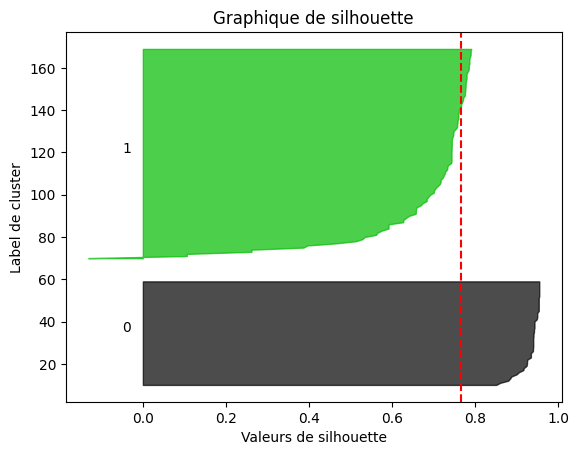

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Définir les plages de epsilon et min_samples
E = np.arange(0.1, 1.0, 0.1)  # epsilon varie de 0.1 à 1.0 par pas de 0.1
K = range(1, 5)  # min_samples varie de 1 à 5

best_eps = 0
best_min_samples = 0
best_score = -1

for eps in E:
    for min_samples in K:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['petal_length', 'petal_width']])
        if len(set(labels)) > 1:  # pour éviter les cas où tous les points sont du bruit
            score = silhouette_score(
                df[['petal_length', 'petal_width']], labels)
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print(f"Meilleurs paramètres : epsilon = {
      best_eps}, min_samples = {best_min_samples}")

# Créer un objet DBSCAN avec les meilleurs paramètres
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Adapter le modèle aux données et obtenir les étiquettes de cluster
labels = dbscan.fit_predict(df[['petal_length', 'petal_width']])

# Ajouter les étiquettes de cluster au DataFrame
df['cluster'] = labels

# Créer un graphique de silhouette
silhouette_values = silhouette_samples(
    df[['petal_length', 'petal_width']], labels)
fig, ax = plt.subplots()
y_lower = 10
# ne pas inclure le bruit dans le graphique de silhouette
for i in range(len(set(labels)) - (1 if -1 in labels else 0)):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / len(set(labels)))
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
ax.set_title("Graphique de silhouette")
ax.set_xlabel("Valeurs de silhouette")
ax.set_ylabel("Label de cluster")
ax.axvline(x=silhouette_score(
    df[['petal_length', 'petal_width']], labels), color="red", linestyle="--")
plt.show()

Now, hopefully you have a solid understanding of what DBSCAN is, how to implement this using Scikit-Learn, and how big of a difference using different hyper-parameters can cause to your clustering algorithm.

In an ideal world, there would be one set of hyperparameters that _always_ performs best for every dataset but unfortunately this isn't the case...

As said multiple times, it should be again be noted that clustering algorithms are typically done using _*ALL*_ columns in the dataset but within this exercise, we only used 2 for easy visualization purposes.

FR

Maintenant, j'espère que vous avez une solide compréhension de ce qu'est DBSCAN, comment l'implémenter en utilisant Scikit-Learn, et à quel point l'utilisation de différents hyperparamètres peut affecter votre algorithme de clustering.

Dans un monde idéal, il y aurait un ensemble d'hyperparamètres qui fonctionne _toujours_ le mieux pour chaque ensemble de données, mais malheureusement ce n'est pas le cas...

Comme mentionné plusieurs fois, il convient de noter à nouveau que les algorithmes de clustering sont généralement effectués en utilisant _*TOUTES*_ les colonnes de l'ensemble de données, mais dans cet exercice, nous n'avons utilisé que 2 colonnes pour des raisons de visualisation facile. 😊
